In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,region,population,area,gdp,literacy,infant_mortality,arable,birthrate,deathrate
0,0.0,0.883468,0.949292,0.023739,0.000000,0.469199,0.414029,0.302444,0.2
1,0.0,0.656127,0.716262,0.259141,0.613980,0.469199,0.414029,0.302444,0.2
2,0.0,0.889631,1.000000,0.319275,0.000000,0.312527,0.414029,0.302444,0.2
3,0.0,0.221791,0.344182,0.388712,0.907468,0.469199,0.335106,0.302444,0.2
4,0.0,0.243748,0.408165,0.669156,1.000000,0.469199,0.414029,0.302444,0.2
5,0.0,0.784492,0.998309,0.123009,0.000000,0.469199,0.414029,0.302444,0.2
6,0.0,0.068557,0.294178,0.407796,0.844982,0.469199,0.214318,0.302444,0.2
7,0.0,0.240608,0.404058,0.478170,0.653472,0.469199,0.414029,0.302444,0.2
8,0.0,0.909896,1.000000,0.483670,0.613980,0.469199,0.414029,0.302444,0.2
9,0.0,0.636643,0.718951,0.213241,0.613980,0.469199,0.414029,0.302444,0.2


In [3]:
X = dataset.drop(columns=['population']).values
Y = dataset['population'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 8


first_hidden_layer_size = 10
second_hidden_layer_size = 6
third_hidden_layer_size = 10

output_layer_size = 1


epochs_number = 50
batch_size = 16

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))


model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 181 samples, validate on 46 samples
Epoch 1/50
181/181 [==============================] - 0s 2ms/step - loss: 0.2495 - mean_absolute_error: 0.4356 - mean_squared_error: 0.2495 - val_loss: 0.2869 - val_mean_absolute_error: 0.4932 - val_mean_squared_error: 0.2869
Epoch 2/50
181/181 [==============================] - 0s 165us/step - loss: 0.1816 - mean_absolute_error: 0.3682 - mean_squared_error: 0.1816 - val_loss: 0.2053 - val_mean_absolute_error: 0.4059 - val_mean_squared_error: 0.2053
Epoch 3/50
181/181 [==============================] - 0s 355us/step - loss: 0.1264 - mean_absolute_error: 0.3058 - mean_squared_error: 0.1264 - val_loss: 0.1382 - val_mean_absolute_error: 0.3263 - val_mean_squared_error: 0.1382
Epoch 4/50
181/181 [==============================] - 0s 197us/step - loss: 0.0899 - mean_absolute_error: 0.2587 - mean_squared_error: 0.0899 - val_loss: 0.0921 - val_mean_absolute_error: 0.2585 - val_mean_squared_error: 0.0921
Epoch 5/50
181/181 [=========================

Epoch 37/50
181/181 [==============================] - 0s 305us/step - loss: 0.0283 - mean_absolute_error: 0.1336 - mean_squared_error: 0.0283 - val_loss: 0.0177 - val_mean_absolute_error: 0.1086 - val_mean_squared_error: 0.0177
Epoch 38/50
181/181 [==============================] - 0s 234us/step - loss: 0.0272 - mean_absolute_error: 0.1315 - mean_squared_error: 0.0272 - val_loss: 0.0183 - val_mean_absolute_error: 0.1112 - val_mean_squared_error: 0.0183
Epoch 39/50
181/181 [==============================] - 0s 336us/step - loss: 0.0265 - mean_absolute_error: 0.1300 - mean_squared_error: 0.0265 - val_loss: 0.0177 - val_mean_absolute_error: 0.1088 - val_mean_squared_error: 0.0177
Epoch 40/50
181/181 [==============================] - 0s 219us/step - loss: 0.0255 - mean_absolute_error: 0.1269 - mean_squared_error: 0.0255 - val_loss: 0.0161 - val_mean_absolute_error: 0.1031 - val_mean_squared_error: 0.0161
Epoch 41/50
181/181 [==============================] - 0s 287us/step - loss: 0.0250 

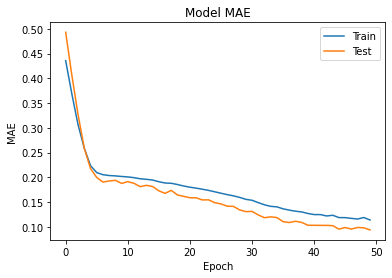

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

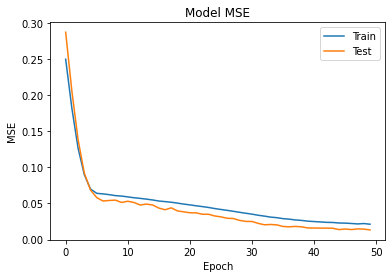

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

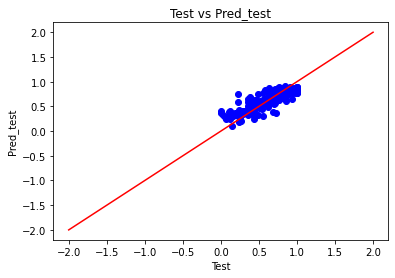

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

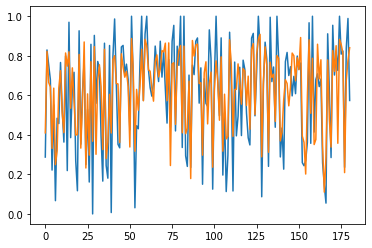

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

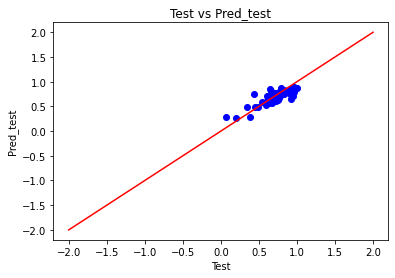

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

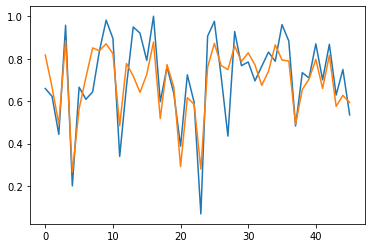

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.14540423268232427
0.11583831971012816


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9904612302780151, p = 0.2711915075778961
Test k = 0.9688848257064819, p = 0.2516983151435852


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9881767630577087, p_s = 0.05819232389330864
k_n = 9.434698021261298, p_n = 0.008938843946497138


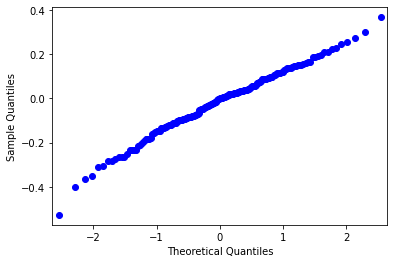

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

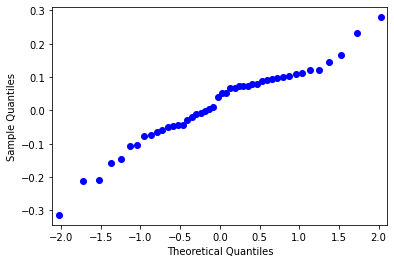

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

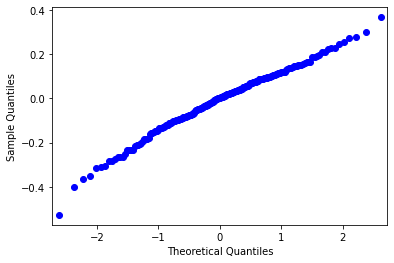

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

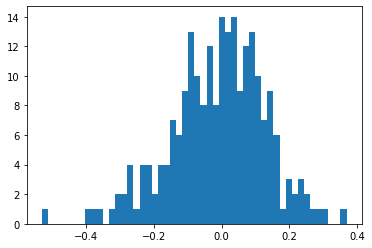

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')